**Importiere die notwendigen Packages**

In [1]:
#%pip install geopandas fiona requests folium mplleaflet contextily

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 
import fiona
import requests
import mplleaflet
import seaborn as sns


Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [3]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_fd_median_vermoegen_kreis_od1008

In [4]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/fd_median_vermoegen_kreis_OD1008/WIR100OD1008.csv"

# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )
print("done")

done


In der Folge ein paar erste Tests:

In [5]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [6]:
data2betested

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
0,1999,1,Kreis 1,0,Grundtarif,23,0,174
1,1999,1,Kreis 1,1,Verheiratetentarif,182,22,711
2,1999,1,Kreis 1,2,Einelternfamilientarif,28,0,283
3,1999,2,Kreis 2,0,Grundtarif,37,3,186
4,1999,2,Kreis 2,1,Verheiratetentarif,148,33,458
...,...,...,...,...,...,...,...,...
715,2018,11,Kreis 11,1,Verheiratetentarif,95,4,352
716,2018,11,Kreis 11,2,Einelternfamilientarif,8,0,89
717,2018,12,Kreis 12,0,Grundtarif,12,0,76
718,2018,12,Kreis 12,1,Verheiratetentarif,39,0,206


In [7]:
data2betested.dtypes

SteuerJahr               int64
KreisSort                int64
KreisLang               object
SteuerTarifSort          int64
SteuerTarifLang         object
SteuerVermoegen_p50    float64
SteuerVermoegen_p25    float64
SteuerVermoegen_p75    float64
dtype: object

In [8]:
data2betested.shape

(720, 8)

Beschreibe einzelne Attribute

In [9]:
data2betested.describe()

,SteuerJahr,KreisSort,SteuerTarifSort,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
count,720,720,720,720,720,720
mean,2008,6,1,71,10,278
std,6,3,1,95,22,309
min,1999,1,0,0,0,12
25%,2004,4,0,16,0,96
50%,2008,6,1,37,0,180
75%,2013,9,2,71,5,306
max,2018,12,2,538,131,1731


Wie viele Nullwerte gibt es im Datensatz?

In [10]:
data2betested.isnull().sum()

SteuerJahr             0
KreisSort              0
KreisLang              0
SteuerTarifSort        0
SteuerTarifLang        0
SteuerVermoegen_p50    0
SteuerVermoegen_p25    0
SteuerVermoegen_p75    0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [11]:
data2betested['SteuerJahr']=pd.to_datetime(data2betested['SteuerJahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
0,1999-01-01,1,Kreis 1,0,Grundtarif,23,0,174
1,1999-01-01,1,Kreis 1,1,Verheiratetentarif,182,22,711
2,1999-01-01,1,Kreis 1,2,Einelternfamilientarif,28,0,283
3,1999-01-01,2,Kreis 2,0,Grundtarif,37,3,186
4,1999-01-01,2,Kreis 2,1,Verheiratetentarif,148,33,458
...,...,...,...,...,...,...,...,...
715,2018-01-01,11,Kreis 11,1,Verheiratetentarif,95,4,352
716,2018-01-01,11,Kreis 11,2,Einelternfamilientarif,8,0,89
717,2018-01-01,12,Kreis 12,0,Grundtarif,12,0,76
718,2018-01-01,12,Kreis 12,1,Verheiratetentarif,39,0,206


Bereite die Daten für die Grafik unten vor

In [12]:
Jahre = data2betested.groupby("SteuerJahr")
len(Jahre)

20

In [13]:
for key, group in Jahre:
    print(key, len(group))

1999-01-01 00:00:00 36
2000-01-01 00:00:00 36
2001-01-01 00:00:00 36
2002-01-01 00:00:00 36
2003-01-01 00:00:00 36
2004-01-01 00:00:00 36
2005-01-01 00:00:00 36
2006-01-01 00:00:00 36
2007-01-01 00:00:00 36
2008-01-01 00:00:00 36
2009-01-01 00:00:00 36
2010-01-01 00:00:00 36
2011-01-01 00:00:00 36
2012-01-01 00:00:00 36
2013-01-01 00:00:00 36
2014-01-01 00:00:00 36
2015-01-01 00:00:00 36
2016-01-01 00:00:00 36
2017-01-01 00:00:00 36
2018-01-01 00:00:00 36


In [14]:
myJahr = "2018-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
684,2018-01-01,1,Kreis 1,0,Grundtarif,47,3,290
685,2018-01-01,1,Kreis 1,1,Verheiratetentarif,398,81,1552
686,2018-01-01,1,Kreis 1,2,Einelternfamilientarif,94,3,420
687,2018-01-01,2,Kreis 2,0,Grundtarif,46,4,223
688,2018-01-01,2,Kreis 2,1,Verheiratetentarif,222,40,696
689,2018-01-01,2,Kreis 2,2,Einelternfamilientarif,39,1,186
690,2018-01-01,3,Kreis 3,0,Grundtarif,33,2,144
691,2018-01-01,3,Kreis 3,1,Verheiratetentarif,128,11,425
692,2018-01-01,3,Kreis 3,2,Einelternfamilientarif,36,0,146
693,2018-01-01,4,Kreis 4,0,Grundtarif,20,0,98


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [15]:
#test = data2betested.groupby(['Quartal'])[['stzh_frau']].agg('median')
#test
# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [16]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [17]:
mySelection = data2betested[(data2betested.KreisSort >1) & (data2betested.SteuerJahr == "2018")] #data2betested.SteuerTarifLang=="Grundtarif") & 
#mySelection = data2betested[['SteuerJahr', 'QuarLang', 'SteuerEInkommen_p50']]
#selVZA = data2betested[['Jahr', 'Quartal', 'stzh_VZA_Frauen', 'stzh_VZA_Maenner', 'stzh_VZA_s2', 'stzh_VZA_s3']]

mySelection.head()


,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
687,2018-01-01,2,Kreis 2,0,Grundtarif,46,4,223
688,2018-01-01,2,Kreis 2,1,Verheiratetentarif,222,40,696
689,2018-01-01,2,Kreis 2,2,Einelternfamilientarif,39,1,186
690,2018-01-01,3,Kreis 3,0,Grundtarif,33,2,144
691,2018-01-01,3,Kreis 3,1,Verheiratetentarif,128,11,425


In [18]:
myGraph = mySelection
myGraph.head()


,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
687,2018-01-01,2,Kreis 2,0,Grundtarif,46,4,223
688,2018-01-01,2,Kreis 2,1,Verheiratetentarif,222,40,696
689,2018-01-01,2,Kreis 2,2,Einelternfamilientarif,39,1,186
690,2018-01-01,3,Kreis 3,0,Grundtarif,33,2,144
691,2018-01-01,3,Kreis 3,1,Verheiratetentarif,128,11,425


In [19]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['SteuerTarifLang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myGraph).encode(
    x='KreisLang',
    y='SteuerVermoegen_p50',
    color='SteuerTarifLang'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [20]:
alt.Chart(myGraph).mark_circle(size=60).encode(
    x='KreisLang',
    y='SteuerVermoegen_p50',
    color='SteuerTarifLang',
    tooltip=['SteuerJahr','SteuerTarifLang', 'KreisLang','SteuerVermoegen_p25', 'SteuerVermoegen_p50','SteuerVermoegen_p75']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

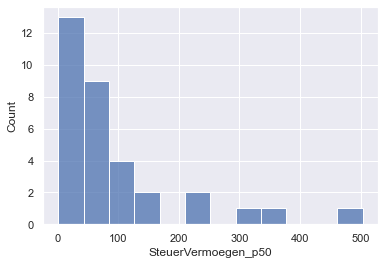

In [21]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=myGraph, x="SteuerVermoegen_p50") #, y="KonOGDKurz")
plt.show();

Test: Choroplethenkarte

### Choroplethenkarte
Importiere die Geodaten als GeoJSON

**Stadtkreise:**

In [22]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Stadtkreise?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_stadtkreise_v"
df_adm_stadtkreise_v = gpd.read_file(geojson_url)

df_adm_stadtkreise_v.head(5)


,id,kname,knr,objid,geometry
0,adm_stadtkreise_v.6,Kreis 7,7,6,"POLYGON ((8.54885 47.36602, 8.54901 47.36601, ..."
1,adm_stadtkreise_v.10,Kreis 11,11,10,"POLYGON ((8.55562 47.40129, 8.55543 47.40137, ..."
2,adm_stadtkreise_v.4,Kreis 9,9,4,"POLYGON ((8.50320 47.38100, 8.50308 47.38131, ..."
3,adm_stadtkreise_v.8,Kreis 2,2,8,"POLYGON ((8.52820 47.36885, 8.52901 47.36938, ..."
4,adm_stadtkreise_v.12,Kreis 10,10,12,"POLYGON ((8.50543 47.39495, 8.50532 47.39497, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [23]:
selectMapAttr1 = data2betested[(data2betested.SteuerTarifLang=="Grundtarif") & (data2betested.SteuerJahr == "2018")]
selectMapAttr2 = data2betested[(data2betested.SteuerTarifLang=="Verheiratetentarif") & (data2betested.SteuerJahr == "2018")]


In [24]:
selectMapAttr1.head(3)
#selectMapAttr1.info()

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
684,2018-01-01,1,Kreis 1,0,Grundtarif,47,3,290
687,2018-01-01,2,Kreis 2,0,Grundtarif,46,4,223
690,2018-01-01,3,Kreis 3,0,Grundtarif,33,2,144


In [27]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

df_adm_stadtkreise_v_rename = df_adm_stadtkreise_v[['geometry', 'knr', 'kname']].rename(columns={'kname': 'KreisLang'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
df_adm_stadtkreise_v_joined = df_adm_stadtkreise_v_rename.merge(selectMapAttr1, on='KreisLang')

print('done')


done


<AxesSubplot:>

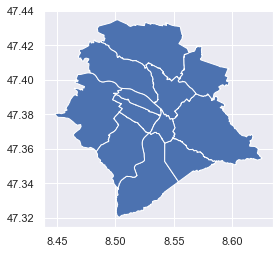

In [28]:
df_adm_stadtkreise_v_joined.plot()

<AxesSubplot:>

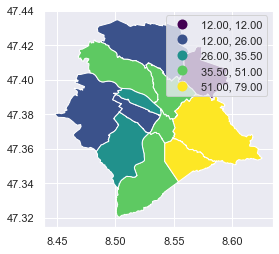

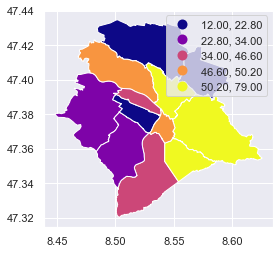

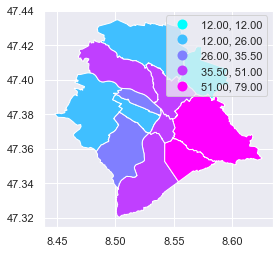

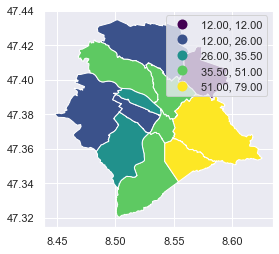

In [29]:
# Plot by StadtKreise

df_adm_stadtkreise_v_joined.plot(column='SteuerVermoegen_p50', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

df_adm_stadtkreise_v_joined.plot(column='SteuerVermoegen_p50', cmap='plasma', scheme='quantiles', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
df_adm_stadtkreise_v_joined.plot(column='SteuerVermoegen_p50', cmap='cool', scheme='fisherjenks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

df_adm_stadtkreise_v_joined.plot(column='SteuerVermoegen_p50', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

----------------------------------------------------------------------------------------

#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html